In [237]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Assignment!

In [238]:
# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to the next line
# reading CSV file into field descrptor
fd_4g = pd.read_csv('Data/4G_Passive_measurements.csv')
print(fd_4g.head(10))

#fd_5g = pd.read_csv('Data/5G_Passive_measurements.csv')
#print(fd_5g.head(10))


   Unnamed: 0        Date          Time           UTC   Latitude  Longitude  Altitude  Speed  EARFCN  Frequency  PCI      MNC  CellIdentity  eNodeB.ID  Power   SINR   RSRP   RSRQ scenario  cellLongitude  cellLatitude  cellPosErrorLambda1  cellPosErrorLambda2  n_CellIdentities    distance  Band                 campaign
0      231098  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  412  "Op"[1]      76860425     300236 -54.38   6.70 -78.68 -19.41       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
1      241306  14.01.2021  09:19:28.214  1.613291e+09  41.896722  12.507302     53.66   4.03    6300      806.0  411  "Op"[1]      76860427     300236 -52.63   5.18 -75.54 -16.26       OW      12.504280     41.890300            10.610001            10.610001                 6  757.483987    20  campaign_6_OW_4G_gaming
2      291097  14.01.2021  09:19:28.840 

In [239]:
grouped_by_operator = fd_4g.groupby('MNC')
signal_quality_columns = ['RSRP', 'RSRQ', 'SINR']
summary_stats = grouped_by_operator[signal_quality_columns].agg(['mean', 'median', 'std'])

# Display the summary statistics for each operator
print(summary_stats)


               RSRP                         RSRQ                       SINR                  
               mean median        std       mean median       std      mean median        std
MNC                                                                                          
"Op"[1] -100.161485 -98.98  15.604314 -20.280126 -19.29  5.536481  0.833658   2.23  11.473351
"Op"[2]  -98.142377 -99.16  12.642518 -20.498862 -19.74  5.272834  0.932823   3.17   9.833226


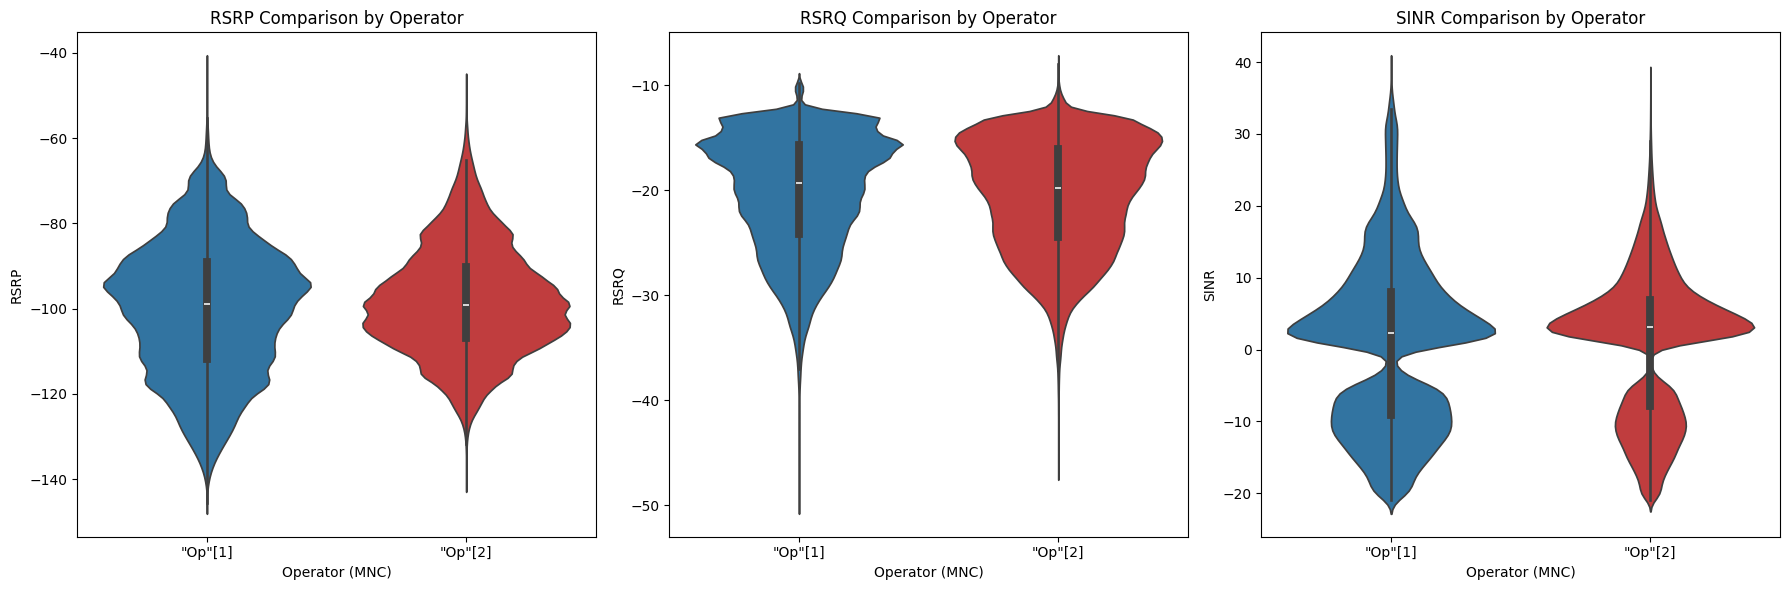

In [240]:
# Create a custom color palette (Blue for "Op"[1], Red for "Op"[2])
custom_palette = {"\"Op\"[1]": "#1f77b4", "\"Op\"[2]": "#d62728"}  # Blue for "Op"[1], Red for "Op"[2]

# Create subplots for RSRP, RSRQ, and SINR
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Violin plot for RSRP
sns.violinplot(x='MNC', y='RSRP', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[0])
axes[0].set_title('RSRP Comparison by Operator')
axes[0].set_xlabel('Operator (MNC)')
axes[0].set_ylabel('RSRP')

# Violin plot for RSRQ
sns.violinplot(x='MNC', y='RSRQ', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[1])
axes[1].set_title('RSRQ Comparison by Operator')
axes[1].set_xlabel('Operator (MNC)')
axes[1].set_ylabel('RSRQ')

# Violin plot for SINR
sns.violinplot(x='MNC', y='SINR', data=fd_4g, hue='MNC', palette=custom_palette, legend=False, ax=axes[2])
axes[2].set_title('SINR Comparison by Operator')
axes[2].set_xlabel('Operator (MNC)')
axes[2].set_ylabel('SINR')

# Adjust layout
plt.tight_layout()
plt.show()

## Summary of Violin Plots for Signal Metrics

### 1. **RSRP (Reference Signal Received Power) Comparison**
   - **RSRP** measures the power of the received signal (in dBm). Lower values indicate weaker signals (closer to -140 dBm), while higher values indicate stronger signals (closer to -60 dBm).
   - **Observations:**
     - Both operators show similar distributions, with most values ranging between -140 dBm and -60 dBm.
     - **Operator 1 ("Op"[1])** has slightly stronger signals on average compared to **Operator 2 ("Op"[2])**, as indicated by the thicker distribution around -100 dBm for Operator 1 and a thinner one for Operator 2.

### 2. **RSRQ (Reference Signal Received Quality) Comparison**
   - **RSRQ** measures the quality of the signal, considering factors like interference and noise (in dB). Lower values indicate poorer quality.
   - **Observations:**
     - **Operator 1 ("Op"[1])** shows better signal quality on average, with RSRQ values centered around -10 to -20 dB.
     - **Operator 2 ("Op"[2])** has a similar distribution but with slightly more data spread out towards lower quality values (between -20 and -40 dB).

### 3. **SINR (Signal to Interference and Noise Ratio) Comparison**
   - **SINR** measures the ratio of signal to interference and noise (in dB). Higher values indicate cleaner, stronger signals with less interference.
   - **Observations:**
     - **Operator 1 ("Op"[1])** shows a higher SINR range, typically between 0 and 30 dB, indicating better signal quality with less interference.
     - **Operator 2 ("Op"[2])** has lower SINR values, ranging from -10 to 20 dB, indicating more interference and lower signal quality on average.

---

### Key Takeaways
- **RSRP (Signal Strength):** Both operators have similar signal strength, but **Operator 1 ("Op"[1])** has a slightly stronger distribution.
- **RSRQ (Signal Quality):** **Operator 1** shows better signal quality compared to **Operator 2**, with values concentrated closer to 0 dB.
- **SINR (Signal to Interference and Noise Ratio):** **Operator 1** provides better overall signal quality with less interference, while **Operator 2** experiences more interference and lower SINR values.


# RSRP For Different Scenarios (OW,IS,OD) For Both Operators

C:\Users\elmir\AppData\Local\Temp\ipykernel_12420\956685114.py:24: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(
C:\Users\elmir\AppData\Local\Temp\ipykernel_12420\956685114.py:44: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(


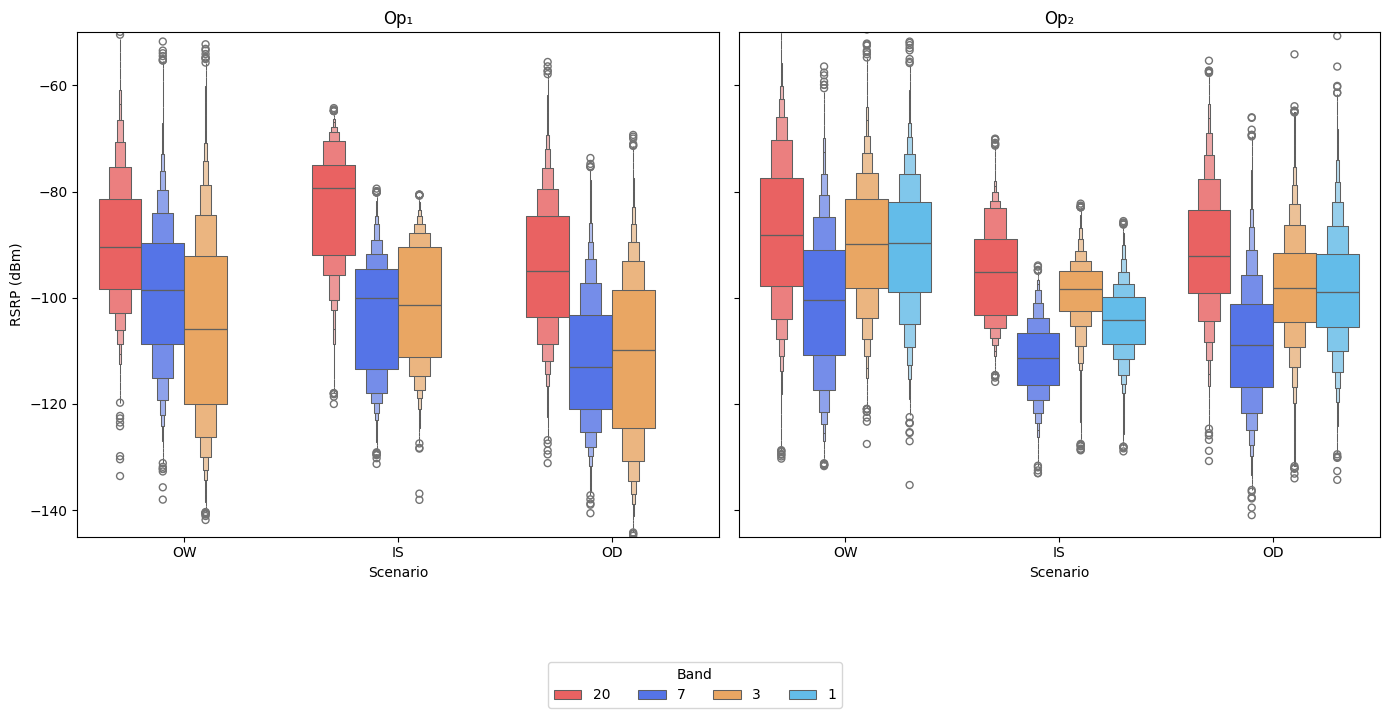

In [241]:
# Extract the numeric part of the MNC field by using string manipulation
fd_4g['MNC_numeric'] = fd_4g['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
fd_4g['MNC_numeric'] = pd.to_numeric(fd_4g['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data = fd_4g[fd_4g['MNC_numeric'] == 1]  # Operator 1
op2_data = fd_4g[fd_4g['MNC_numeric'] == 2]  # Operator 2

hue_order = [20, 7, 3, 1]

# Set up the exact color palette, now including Band 1

palette = {
    20: '#ff4c4c',  # Very Bright Red for Band 20
    3: '#ffa64d',   # Vibrant Orange for Band 3
    1: '#4dc3ff',   # Bright Light Blue for Band 1
    7: '#3d66ff'    # Bold Dark Blue for Band 7
}

# Set up subplots: 1 row, 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Operator 1 (Op1)
sns.boxenplot(
    x='scenario',
    y='RSRP',
    hue='Band',
    data=op1_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[0]
)
axes[0].set_title('Op₁')
axes[0].set_ylabel('RSRP (dBm)')
axes[0].set_xlabel('Scenario')

# Remove the legend from this plot
axes[0].get_legend().remove()

# Plot for Operator 2 (Op2) - Note that Band 1 should now appear here
sns.boxenplot(
    x='scenario',
    y='RSRP',
    hue='Band',
    data=op2_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[1]
)
axes[1].set_title('Op₂')
axes[1].set_ylabel('RSRP (dBm)')
axes[1].set_xlabel('Scenario')

# Remove the legend from this plot as well
axes[1].get_legend().remove()

# Add a single combined legend for both plots, and position it at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Band', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

# Set y-axis limits to match the scaling in your reference image
axes[0].set_ylim(-145, -50)  # Adjust to match the RSRP scale
axes[1].set_ylim(-145, -50)

plt.tight_layout()
plt.show()

# SINR For Different Scenarios (OW,IS,OD) For Both Operators

C:\Users\elmir\AppData\Local\Temp\ipykernel_12420\73690476.py:22: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(
C:\Users\elmir\AppData\Local\Temp\ipykernel_12420\73690476.py:42: FutureWarning: 

The `scale` parameter has been renamed to `width_method` and will be removed in v0.15. Pass `width_method='exponential' for the same effect.
  sns.boxenplot(


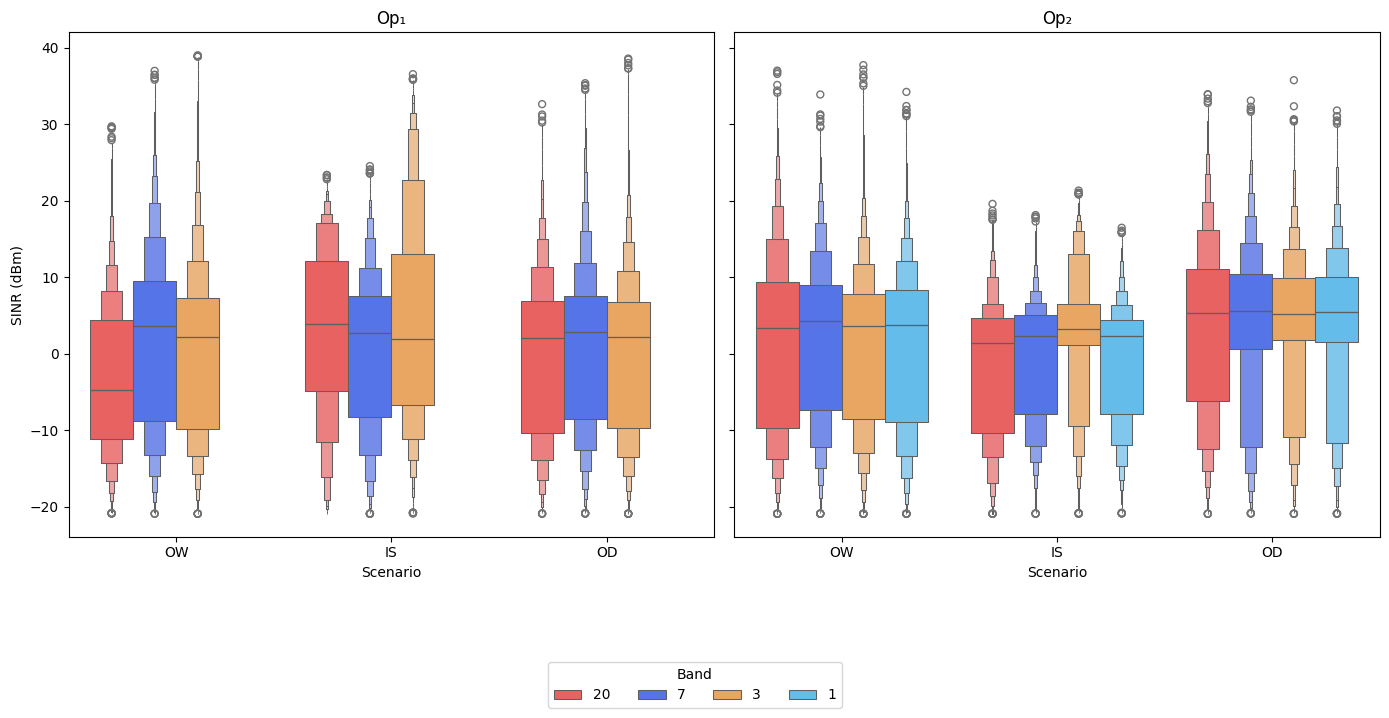

In [242]:
# Extract the numeric part of the MNC field by using string manipulation
fd_4g['MNC_numeric'] = fd_4g['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
fd_4g['MNC_numeric'] = pd.to_numeric(fd_4g['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data = fd_4g[fd_4g['MNC_numeric'] == 1]  # Operator 1
op2_data = fd_4g[fd_4g['MNC_numeric'] == 2]  # Operator 2

hue_order = [20, 7, 3, 1]
# Set up the exact color palette, now including Band 1
palette = {
    20: '#ff4c4c',  # Very Bright Red for Band 20
    3: '#ffa64d',   # Vibrant Orange for Band 3
    1: '#4dc3ff',   # Bright Light Blue for Band 1
    7: '#3d66ff'    # Bold Dark Blue for Band 7
}

# Set up subplots: 1 row, 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Operator 1 (Op1)
sns.boxenplot(
    x='scenario',
    y='SINR',
    hue='Band',
    data=op1_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[0]
)
axes[0].set_title('Op₁')
axes[0].set_ylabel('SINR (dBm)')
axes[0].set_xlabel('Scenario')

# Remove the legend from this plot
axes[0].get_legend().remove()

# Plot for Operator 2 (Op2) - Note that Band 1 should now appear here
sns.boxenplot(
    x='scenario',
    y='SINR',
    hue='Band',
    data=op2_data,
    dodge=True,
    palette=palette,  # Using the correct color palette
    hue_order=hue_order,
    k_depth='tukey',
    scale='exponential',
    ax=axes[1]
)
axes[1].set_title('Op₂')
axes[1].set_ylabel('SINR (dBm)')
axes[1].set_xlabel('Scenario')

# Remove the legend from this plot as well
axes[1].get_legend().remove()

# Add a single combined legend for both plots, and position it at the bottom
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, title='Band', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=4)

# Set y-axis limits to match the scaling in your reference image

plt.tight_layout()
plt.show()

# RSRP (x-axis) and SINR (y-axis) for both operators, with color coding for different frequency bands. However, it looks like the data points are densely packed, making it a bit challenging to interpret at a glance

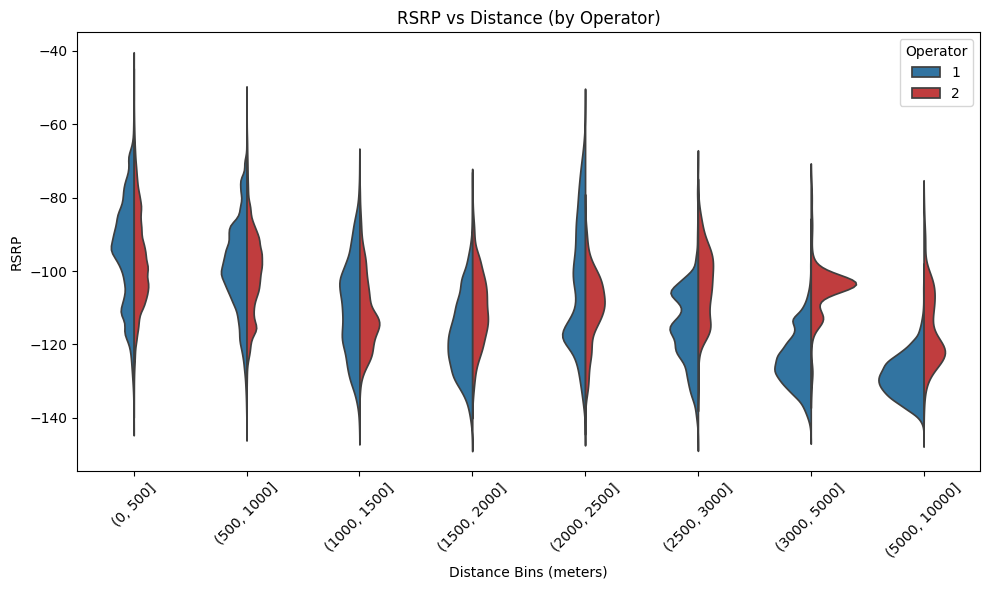

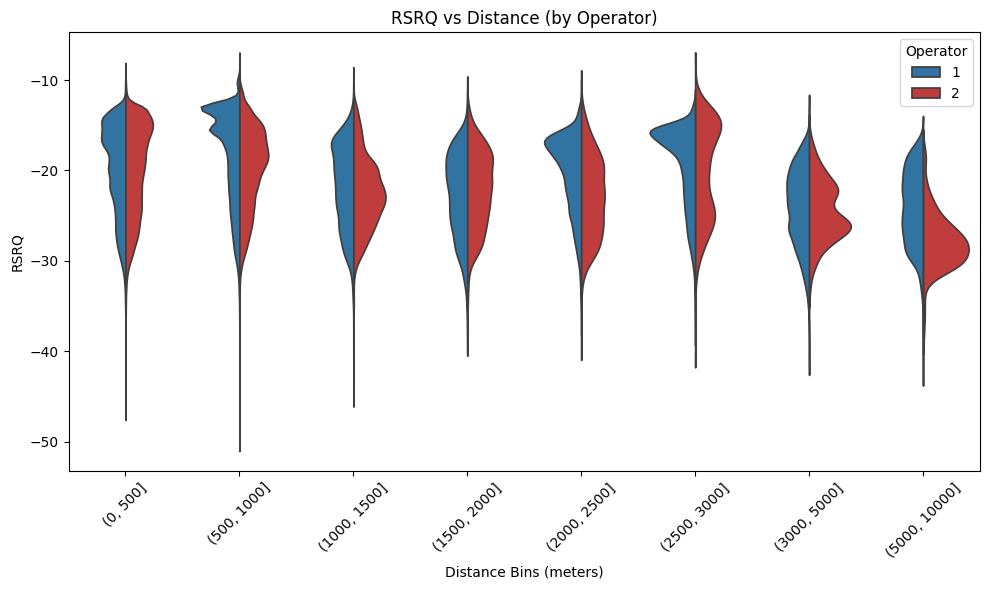

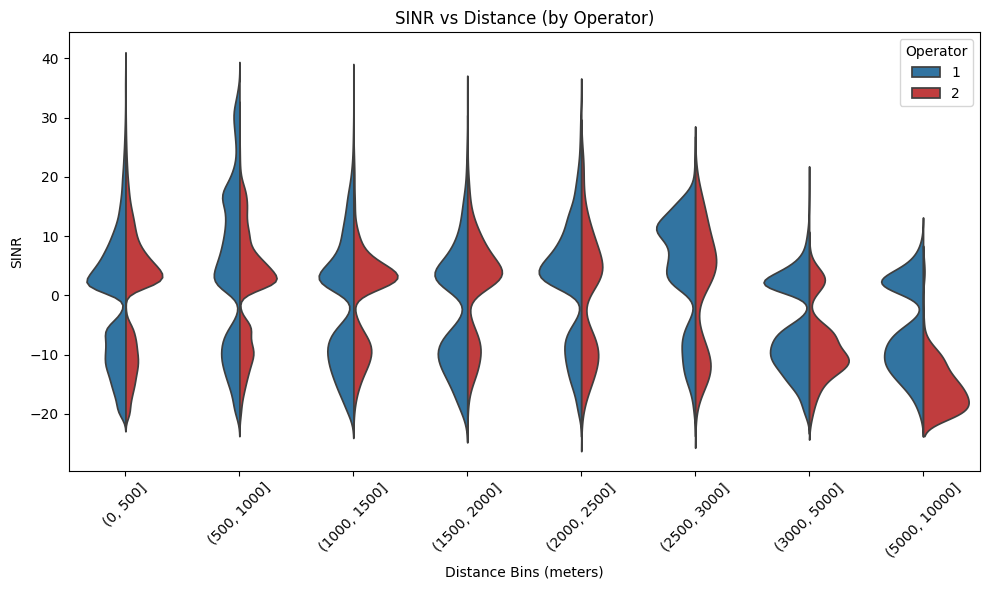

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt


columns_of_interest = ['SINR', 'RSRP', 'RSRQ', 'distance', 'Band', 'MNC_numeric']  # Adjust according to your dataset
filtered_data = fd_4g[columns_of_interest].dropna()

# Create distance bins
distance_bins = pd.cut(filtered_data['distance'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000])

# Add the distance bins to the dataset
filtered_data['distance_bin'] = distance_bins
# Custom palette for operators using integers
custom_palette = {1: "#1f77b4", 2: "#d62728"}  # Blue for Op₁, Red for Op₂

# Function to create violin plots with cleaner visuals
def plot_violin(metric):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='distance_bin', y=metric, hue='MNC_numeric', data=filtered_data, palette=custom_palette, split=True, inner=None)  # Removed the black box plot inside
    plt.title(f'{metric} vs Distance (by Operator)')
    plt.xlabel('Distance Bins (meters)')
    plt.ylabel(metric)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Operator')
    plt.tight_layout()
    plt.show()

# Plot for RSRP
plot_violin('RSRP')

# Plot for RSRQ
plot_violin('RSRQ')

# Plot for SINR
plot_violin('SINR')


# Distance vs SINR, RSRP, RSRQ

In [244]:
from matplotlib.colors import LinearSegmentedColormap

# Funciton definitions for generating differerent heatmaps

def categorize_distance(distance):
    if distance <= 500:
        return '0-500'
    elif distance <= 1000:
        return '500-1000'
    elif distance <= 3000:
        return '1000-3000'
    else:
        return '3000-5000'

def generate_heat_map(filtered_data, metric):

    # Group the data by distance_bucket and op_scenario, and calculate the mean RSRQ
    heatmap_data = filtered_data.groupby(['distance_bucket', 'op_scenario'], observed=False)[metric].median().unstack()

    # Create a custom colormap from the middle part of 'magma'
    magma_middle = LinearSegmentedColormap.from_list('inferno_middle', plt.cm.magma(np.linspace(0.1, 0.5, 256)))  # Using a section of the colormap

    # Plot the heatmap with the custom colormap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, cmap=magma_middle, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': metric}, yticklabels=True )
     
    plt.title(f'Heatmap of {metric} by Distance and Operator/Scenario')
    plt.ylabel('Distance Buckets (m)', labelpad=20)
    plt.xlabel('Operator and Scenario')

    # Rotate X and Y axis labels
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=45)

    # Flip the Y-axis so smaller distances are on top
    plt.gca().invert_yaxis()

    plt.tight_layout()
    plt.show()


def create_separate_heatmaps(filtered_data, metric):
    # Create a smaller figure with 2 subplots in one row (side by side) WITHOUT shared Y-axis
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # No sharey=True to keep independent Y-axes

    # Plot for Operator 1
    operator_1_data = filtered_data[filtered_data['MNC_numeric'] == 1]
    heatmap_data_1 = operator_1_data.groupby(['distance_bucket', 'scenario'], observed=False)[metric].median().unstack()

    # Create a custom colormap from the middle part of 'magma'
    magma_middle = LinearSegmentedColormap.from_list('magma_middle', plt.cm.magma(np.linspace(0.1, 0.5, 256)))  # Using a section of the colormap
    
    # Plot the heatmap for Operator 1
    sns.heatmap(heatmap_data_1, cmap=magma_middle, annot=True, fmt=".2f", linewidths=.5, 
                cbar_kws={'label': metric}, yticklabels=True, ax=axes[0])

    # Customize the plot for Operator 1
    axes[0].set_title(f'Heatmap of {metric} for Operator 1')
    axes[0].set_xlabel('Scenario')
    axes[0].set_ylabel('Distance Buckets (m)', labelpad=30)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].tick_params(axis='y', rotation=45)
    axes[0].invert_yaxis()  # Reverse the Y-axis so smaller distances appear at the top
    
    # Plot for Operator 2
    operator_2_data = filtered_data[filtered_data['MNC_numeric'] == 2]
    heatmap_data_2 = operator_2_data.groupby(['distance_bucket', 'scenario'], observed=False)[metric].median().unstack()

    # Plot the heatmap for Operator 2
    sns.heatmap(heatmap_data_2, cmap=magma_middle, annot=True, fmt=".2f", linewidths=.5, 
                cbar_kws={'label': metric}, yticklabels=True, ax=axes[1])

    # Customize the plot for Operator 2
    axes[1].set_title(f'Heatmap of {metric} for Operator 2')
    axes[1].set_xlabel('Scenario')
    #axes[1].set_ylabel('Distance Buckets (m)', labelpad=30)  # Enable Y-axis labels for the second plot
    axes[1].set_ylabel('')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].tick_params(axis='y', rotation=45)
    axes[1].invert_yaxis()  # Reverse the Y-axis so smaller distances appear at the top
    
    # Increase the space between the two subplots
    plt.subplots_adjust(wspace=0.6)  # Increase the space between the plots

    # Adjust layout to ensure no overlap
    plt.tight_layout()
    plt.show()

In [245]:
# Step 1: Select the columns of interest
columns_of_interest = ['SINR', 'RSRP', 'RSRQ', 'distance', 'Band', 'Frequency', 'MNC_numeric', 'scenario', 'campaign']
filtered_data = fd_4g[columns_of_interest].dropna()

# Step 3: Apply the distance categorization to the filtered data
filtered_data['distance_bucket'] = filtered_data['distance'].apply(categorize_distance)

# Group by both 'distance_bucket' and 'MNC_numeric' (operator), and count the number of data points
bucket_operator_counts = filtered_data.groupby(['distance_bucket', 'MNC_numeric']).size().unstack()

# Display the result
#print(bucket_operator_counts.sort_index(key=lambda x: x.str.extract('(\d+)', expand=False).astype(int)))
#print('Looks like the data is not balanced. op2 seems to have more data in the 0-500m range while op1 has more data in the larger buckets.')
# Step 4: Order the distance buckets correctly using pd.Categorical
distance_order = ['0-500', '500-1000', '1000-3000', '3000-5000']

filtered_data['distance_bucket'] = pd.Categorical(filtered_data['distance_bucket'], categories=distance_order, ordered=True)

# Step 5: Create a new column that combines operator (MNC_numeric) and scenario, and append 'op' to the operator
filtered_data['op_scenario'] = 'op' + filtered_data['MNC_numeric'].astype(str) + ' (' + filtered_data['scenario'] + ')'


## Op1 & Op2 Combined (in the same heatmap)

### SINR

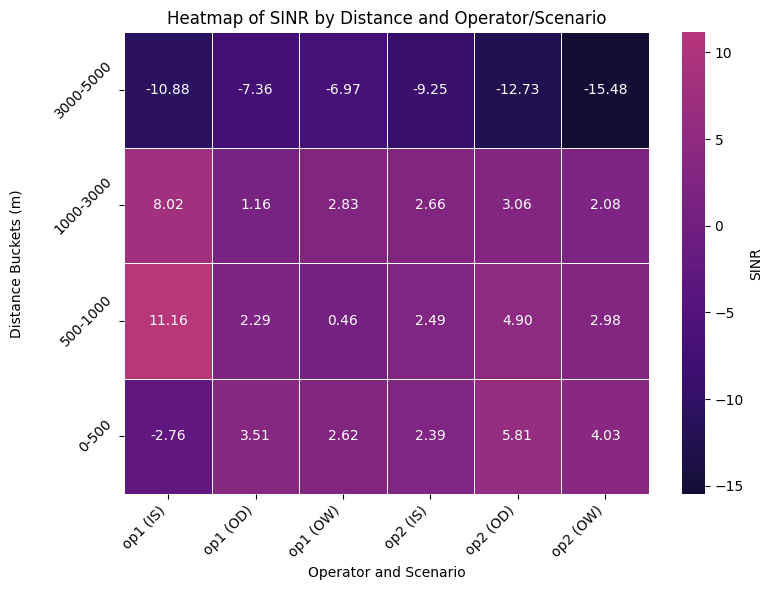

In [246]:
generate_heat_map(filtered_data=filtered_data, metric='SINR')

### RSRP

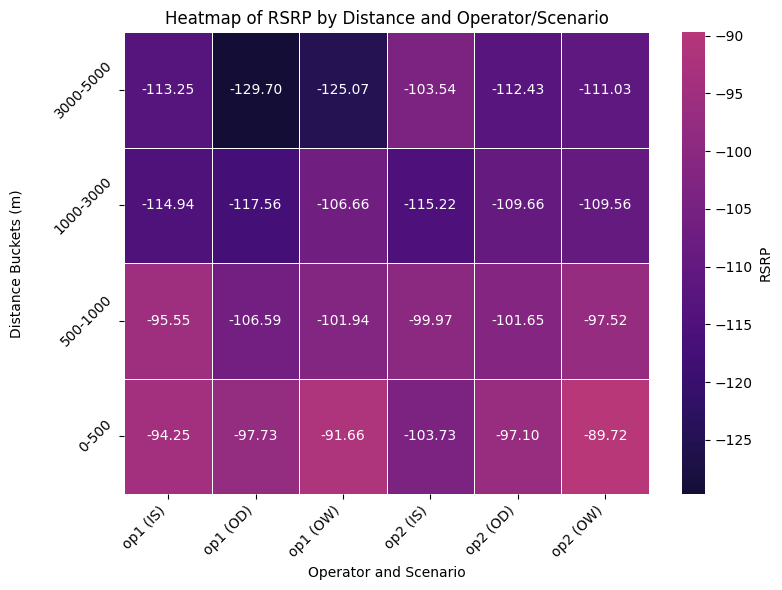

In [247]:
generate_heat_map(filtered_data=filtered_data, metric='RSRP')

### RSRQ

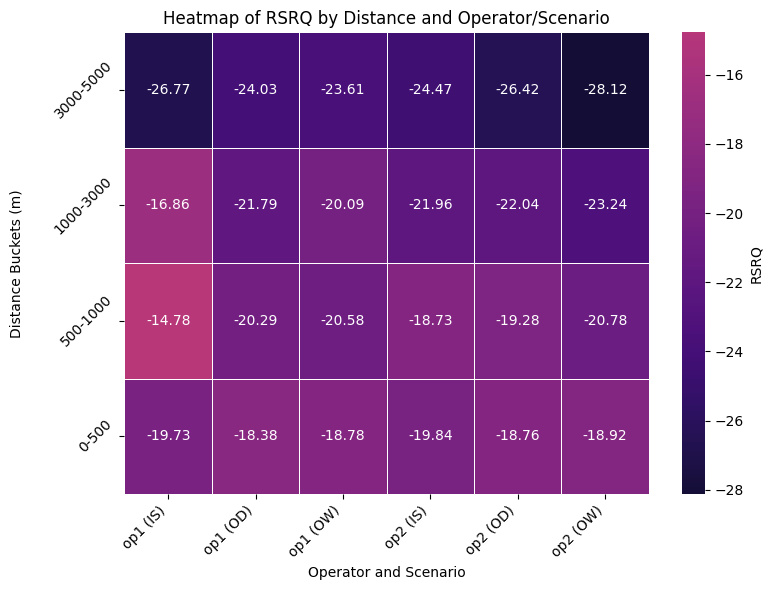

In [248]:
generate_heat_map(filtered_data=filtered_data, metric='RSRQ')

## Op1 & Op2 Seperate (each get their own heatmaps)

### SINR

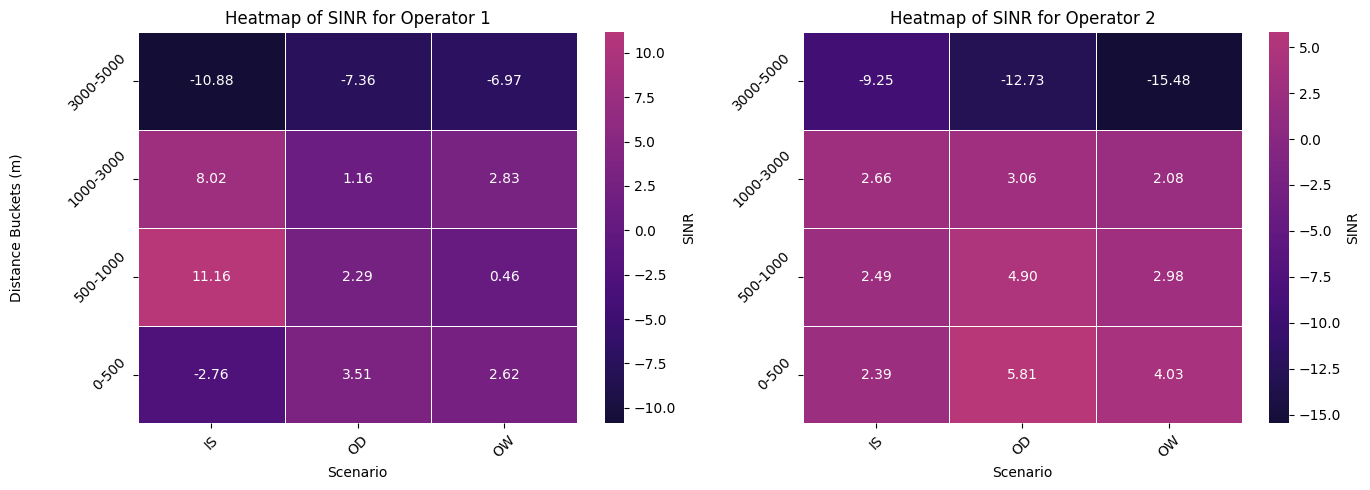

In [249]:
create_separate_heatmaps(filtered_data=filtered_data, metric='SINR')

### RSRP

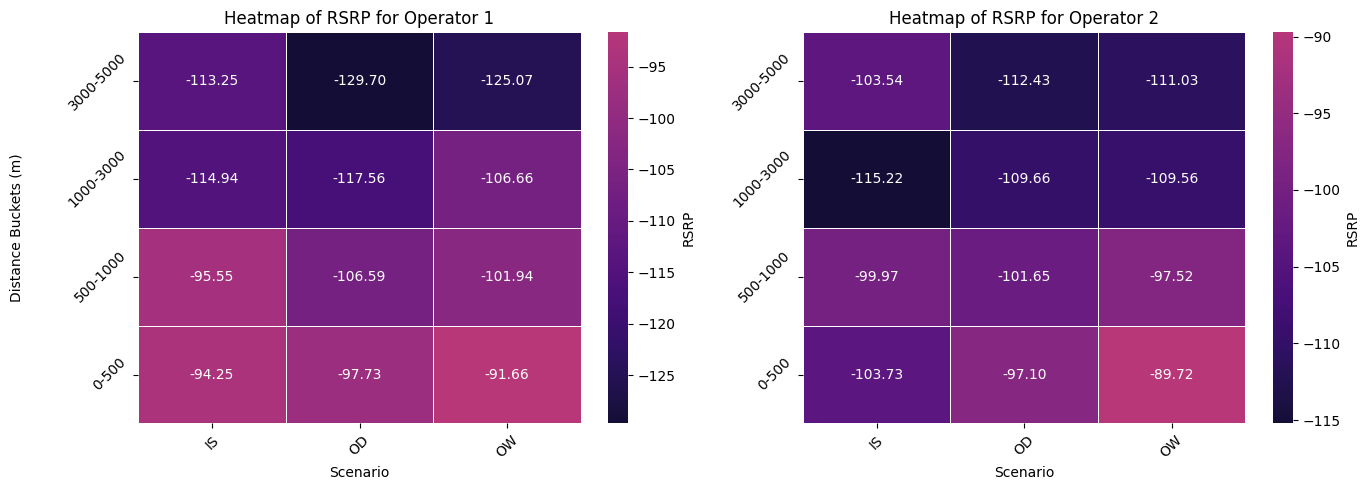

In [250]:
create_separate_heatmaps(filtered_data=filtered_data, metric='RSRP')

### RSRQ

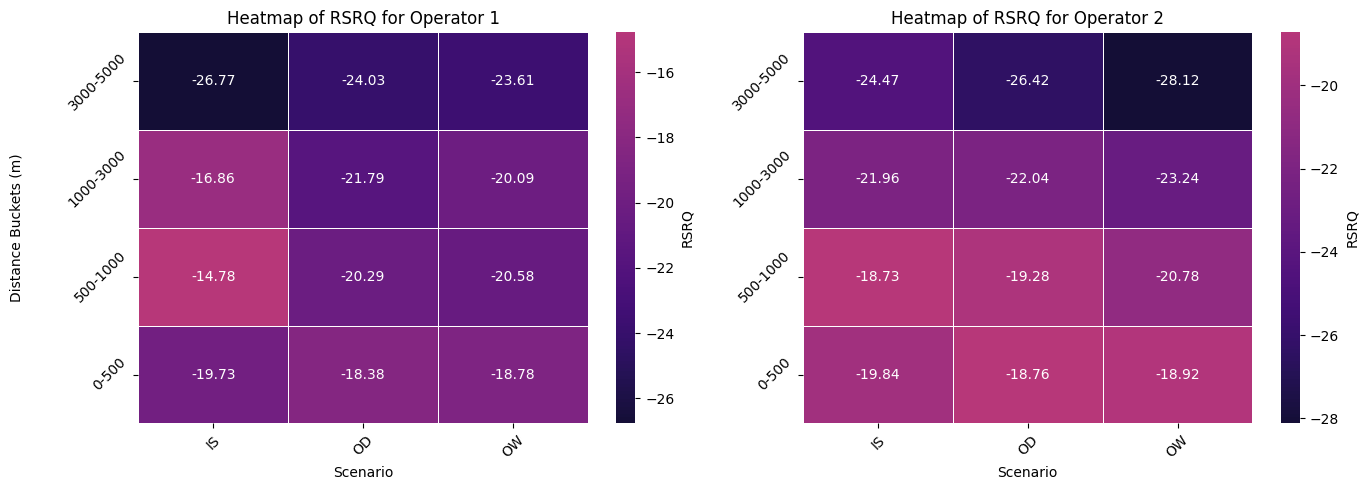

In [251]:
create_separate_heatmaps(filtered_data=filtered_data, metric='RSRQ')

# 5G

## Functions

In [252]:
from sklearn.cluster import DBSCAN
import numpy as np
import folium
import base64
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from io import BytesIO

def create_map_with_clustering(most_measured_data, metric, eps=0.001, min_samples=3, vmin=None, vmax=None):
    # Generate the color bar image and return it as a base64 string
    def create_colorbar_base64(cmap, vmin, vmax):
        fig, ax = plt.subplots(figsize=(1.5, 6))  # Increase the size (width=1.5, height=6 for better visibility)
        norm = Normalize(vmin=vmin, vmax=vmax)
        fig.subplots_adjust(right=0.5)

        # Create the colorbar
        cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='vertical')
        cb1.set_label(metric, fontsize=12)  # Adjust the label font size

        # Save the image to a BytesIO object
        img = BytesIO()
        plt.savefig(img, format='png', bbox_inches='tight', pad_inches=0.1, dpi=300)  # Save at higher dpi for quality

        # Close the plot after saving
        plt.close()

        # Encode the image as base64
        img.seek(0)
        return base64.b64encode(img.read()).decode('utf-8')

    # Use provided min/max values or calculate from the dataset if not provided
    vmin = vmin if vmin is not None else most_measured_data[metric].min()
    vmax = vmax if vmax is not None else most_measured_data[metric].max()

    # Generate the base64 color bar image
    colorbar_base64 = create_colorbar_base64(plt.get_cmap('RdYlBu'), vmin, vmax)

    # Normalize SINR (or any other metric) values to range between 0 and 1 for color mapping
    norm = Normalize(vmin=vmin, vmax=vmax)
    cmap = plt.get_cmap('RdYlBu')

    # Prepare data for clustering: Latitude and Longitude
    coords = most_measured_data[['Latitude', 'Longitude']].values

    # Use DBSCAN clustering to group nearby points
    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean').fit(coords)
    
    # Assign cluster labels to the data
    most_measured_data.loc[:, 'cluster'] = db.labels_

    # Filter out noise points (DBSCAN labels them as -1)
    clustered_data = most_measured_data[most_measured_data['cluster'] != -1]

    # Group by clusters and compute the median location and metric for each cluster
    clustered_data = clustered_data.groupby('cluster').agg({
        'Latitude': 'median',
        'Longitude': 'median',
        metric: 'median'
    }).reset_index()

    # Initialize the map (assuming the first point's location for centering the map)
    center_lat = clustered_data['Latitude'].mean()
    center_lon = clustered_data['Longitude'].mean()
    m = folium.Map(location=[center_lat, center_lon], zoom_start=13, tiles='CartoDB positron')

    # Add CircleMarkers for the clustered data points
    for idx, row in clustered_data.iterrows():
        sinr_normalized = norm(row[metric])  # Normalize SINR value
        color = mpl.colors.to_hex(cmap(sinr_normalized))  # Get the color from the colormap

        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,  # Adjust radius size for visibility
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.8,
            popup=f"{metric}: {row[metric]:.2f}"
        ).add_to(m)

    # Add colorbar as HTML
    colorbar_html = f"""
    <div style="position: fixed;
                top: 50%; transform: translateY(-50%);
                right: 50px; width: 60px; height: 300px;
                background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
                <img src="data:image/png;base64,{colorbar_base64}" style="width:60px;height:300px;">
    </div>
    """

    # Attach colorbar to the map
    m.get_root().html.add_child(folium.Element(colorbar_html))

    # Display the map
    return m

## Data

In [253]:
# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to the next line
# reading CSV file into field descrptor
fd_5g = pd.read_csv('Data/5G_Passive_measurements.csv')
#print(fd_5g.head(10))

#fd_5g = pd.read_csv('Data/5G_Passive_measurements.csv')
#print(fd_5g.head(10))

In [254]:
data = fd_5g

# Extract the numeric part of the MNC field by using string manipulation
data['MNC_numeric'] = data['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
data['MNC_numeric'] = pd.to_numeric(data['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data_5g = data[data['MNC_numeric'] == 1]  # Operator 1
op2_data_5g = data[data['MNC_numeric'] == 2]  # Opeurator 2

# Group the data by campaign and count the number of measurements for each eNodeB
enodeb_counts_op1_5g = op1_data_5g.groupby('campaign').size().reset_index(name='measurement_count')
enodeb_counts_op2_5g = op2_data_5g.groupby('campaign').size().reset_index(name='measurement_count')

In [266]:
# These are a few overlapping campaigns (e.g campaigns that took measurements for both Operator 1 and Operator 2). 
campaigns = ['campaign_25_OW_5G', 'campaign_40_OW_5G_speedtest', 'campaign_21_OW_5G_speedtest', 'campaign_21_OW_5G']

campaign = campaigns[0]
most_measured_data_op1_5g = op1_data_5g[op1_data_5g['campaign'] == campaign] 
#print(most_measured_data_op1_5g.head(10))

# Get the eNodeB.ID with the most measurements
most_measured_data_op2_5g = op2_data_5g[op2_data_5g['campaign'] == campaign] 
print(most_measured_data_op2_5g.head(10))

         Unnamed: 0        Date          Time           UTC  Latitude  Longitude  Altitude  Speed  EARFCN  Frequency  Band  PCI  SSBIdx  SSS-SINR  SSS-RSRP  SSS-RSRQ  SSS-RePower      MNC  DM_RS-SINR  DM_RS-RSRP  DM_RS-RSRQ  DM_RS-RePower  PBCH-SINR  PBCH-RSRP  PBCH-RSRQ  PBCH-RePower  PSS-SINR  PSS-RSRP  PSS-RSRQ  PSS-RePower  SS_PBCH-SINR  SS_PBCH-RSRP  SS_PBCH-RSRQ  SS_PBCH-RePower scenario  distance_w           campaign  MNC_numeric
4404613     2967308  31.12.2020  09:21:08.099  1.612081e+09  41.87141   12.46268     77.93   2.59  643296    3649.44    78  206       0      -9.6    -122.2     -21.2       -112.3  "Op"[2]        -8.8      -122.2       -20.5         -112.7       -8.0     -122.2      -20.5        -113.4      -9.6    -122.2     -21.3       -112.2          -8.7        -122.2         -20.8           -112.9       OW         0.0  campaign_25_OW_5G            2
4404614     2968309  31.12.2020  09:21:08.459  1.612081e+09  41.87141   12.46268     77.93   2.59  643296    3649.44  

In [256]:
######################### SINR  #################################
min_op1_sinr_5g = most_measured_data_op1_5g['SSS-SINR'].min() 
max_op1_sinr_5g = most_measured_data_op1_5g['SSS-SINR'].max()

min_op2_sinr_5g = most_measured_data_op2_5g['SSS-SINR'].min() 
max_op2_sinr_5g = most_measured_data_op2_5g['SSS-SINR'].max()

vmin_sinr = min([min_op1_sinr_5g, min_op2_sinr_5g])
vmax_sinr = max([max_op1_sinr_5g, max_op2_sinr_5g])

######################### RSRP #################################
min_op1_rsrp_5g = most_measured_data_op1_5g['SSS-RSRP'].min() 
max_op1_rsrp_5g = most_measured_data_op1_5g['SSS-RSRP'].max()

min_op2_rsrp_5g = most_measured_data_op2_5g['SSS-RSRP'].min() 
max_op2_rsrp_5g = most_measured_data_op2_5g['SSS-RSRP'].max()

vmin_rsrp = min([min_op1_rsrp_5g, min_op2_rsrp_5g])
vmax_rsrp = max([max_op1_rsrp_5g, max_op2_rsrp_5g])

######################### RSRQ #################################
min_op1_rsrq_5g = most_measured_data_op1_5g['SSS-RSRQ'].min() 
max_op1_rsrq_5g = most_measured_data_op1_5g['SSS-RSRQ'].max()

min_op2_rsrq_5g = most_measured_data_op2_5g['SSS-RSRQ'].min() 
max_op2_rsrq_5g = most_measured_data_op2_5g['SSS-RSRQ'].max()

vmin_rsrq = min([min_op1_rsrq_5g, min_op2_rsrq_5g])
vmax_rsrq = max([max_op1_rsrq_5g, max_op2_rsrq_5g])


## Maps

### SINR

#### Operator 1

In [264]:
map_op1_sinr = create_map_with_clustering(most_measured_data_op1_5g, 'SSS-SINR', eps=0.00001, min_samples=30, vmin= vmin_sinr, vmax=vmax_sinr)
#map_op1_sinr

#### RSRP

In [265]:
map_op1_rsrp = create_map_with_clustering(most_measured_data_op1_5g, 'SSS-RSRP', eps=0.00001, min_samples=30, vmin= vmin_rsrp, vmax=vmax_rsrp)
#map_op1_rsrp

#### RSRQ

In [259]:
map_op1_rsrq = create_map_with_clustering(most_measured_data_op1_5g, 'SSS-RSRQ', eps=0.00001, min_samples=30, vmin= vmin_rsrq, vmax=vmax_rsrq)
#map_op1_rsrq

### Operator 2

#### SINR

In [263]:
map_op2_sinr = create_map_with_clustering(most_measured_data_op2_5g, 'SSS-SINR', eps=0.00001, min_samples=30, vmin= vmin_sinr, vmax=vmax_sinr)
#map_op2_sinr

#### RSRP

In [261]:
map_op2_rsrp = create_map_with_clustering(most_measured_data_op2_5g, 'SSS-RSRP', eps=0.00001, min_samples=30, vmin= vmin_rsrp, vmax=vmax_rsrp)
#map_op2_rsrp

#### RSRQ

In [262]:
map_op2_rsrq = create_map_with_clustering(most_measured_data_op2_5g, 'SSS-RSRQ', eps=0.00001, min_samples=150, vmin= vmin_rsrq, vmax=vmax_rsrq)
#map_op2_rsrq

# 5G COVERAGE Plots

In [267]:
# Set display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # This will display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to the next line
# reading CSV file into field descrptor
fd_5g = pd.read_csv('Data/5G_Passive_measurements.csv')
#print(fd_5g.head(10))

#fd_5g = pd.read_csv('Data/5G_Passive_measurements.csv')
#print(fd_5g.head(10))


data = fd_5g

# Extract the numeric part of the MNC field by using string manipulation
data['MNC_numeric'] = data['MNC'].str.extract(r'\[(\d+)\]')  # Extract the number inside the brackets
data['MNC_numeric'] = pd.to_numeric(data['MNC_numeric'])  # Convert to numeric for easier filtering

# Filter data for each operator
op1_data_5g = data[data['MNC_numeric'] == 1]  # Operator 1
op2_data_5g = data[data['MNC_numeric'] == 2]  # Opeurator 2

# Group the data by campaign and count the number of measurements for each eNodeB
enodeb_counts_op1_5g = op1_data_5g.groupby('campaign').size().reset_index(name='measurement_count')
enodeb_counts_op2_5g = op2_data_5g.groupby('campaign').size().reset_index(name='measurement_count')

In [275]:
# These are a few overlapping campaigns (e.g campaigns that took measurements for both Operator 1 and Operator 2). 
campaigns = ['campaign_25_OW_5G', 'campaign_40_OW_5G_speedtest', 'campaign_21_OW_5G_speedtest', 'campaign_21_OW_5G']

campaign = campaigns[0]
most_measured_data_op1_5g = op1_data_5g[op1_data_5g['campaign'] == campaign] 
#print(most_measured_data_op1_5g.head(10))

# Get the eNodeB.ID with the most measurements
most_measured_data_op2_5g = op2_data_5g[op2_data_5g['campaign'] == campaign] 
print(most_measured_data_op2_5g.head(10))

         Unnamed: 0        Date          Time           UTC  Latitude  Longitude  Altitude  Speed  EARFCN  Frequency  Band  PCI  SSBIdx  SSS-SINR  SSS-RSRP  SSS-RSRQ  SSS-RePower      MNC  DM_RS-SINR  DM_RS-RSRP  DM_RS-RSRQ  DM_RS-RePower  PBCH-SINR  PBCH-RSRP  PBCH-RSRQ  PBCH-RePower  PSS-SINR  PSS-RSRP  PSS-RSRQ  PSS-RePower  SS_PBCH-SINR  SS_PBCH-RSRP  SS_PBCH-RSRQ  SS_PBCH-RePower scenario  distance_w           campaign  MNC_numeric
4404613     2967308  31.12.2020  09:21:08.099  1.612081e+09  41.87141   12.46268     77.93   2.59  643296    3649.44    78  206       0      -9.6    -122.2     -21.2       -112.3  "Op"[2]        -8.8      -122.2       -20.5         -112.7       -8.0     -122.2      -20.5        -113.4      -9.6    -122.2     -21.3       -112.2          -8.7        -122.2         -20.8           -112.9       OW         0.0  campaign_25_OW_5G            2
4404614     2968309  31.12.2020  09:21:08.459  1.612081e+09  41.87141   12.46268     77.93   2.59  643296    3649.44  

### SSS-SINR

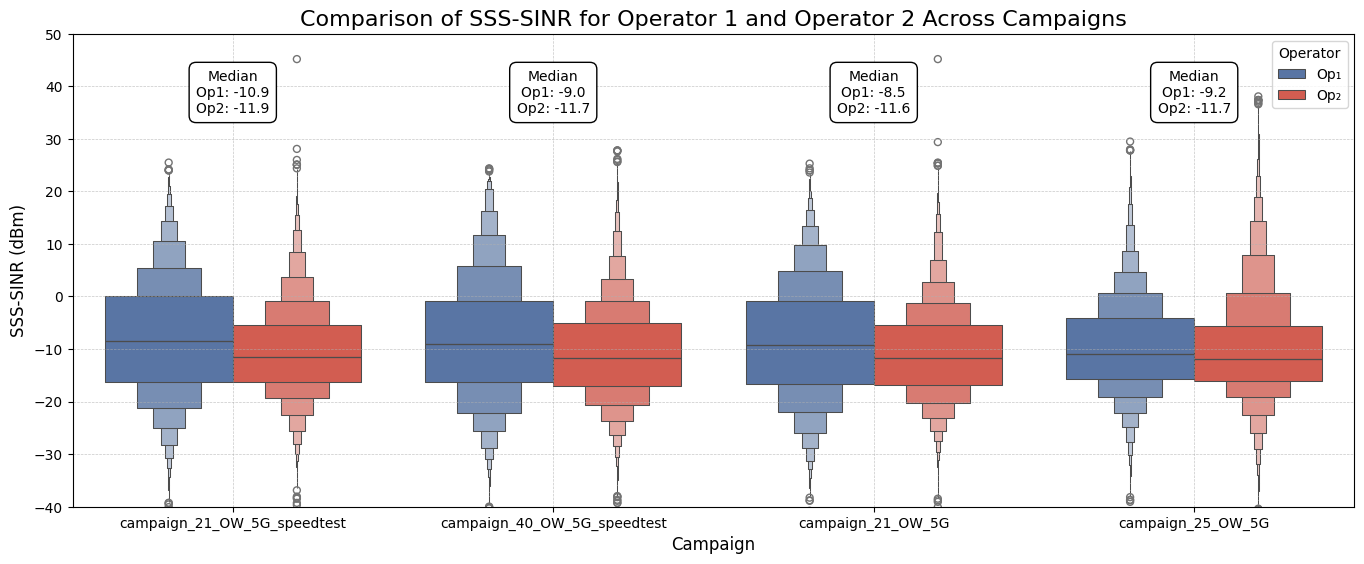

In [357]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use .loc to avoid SettingWithCopyWarning
op1_data_5g.loc[:, 'Operator'] = 'Op₁'
op2_data_5g.loc[:, 'Operator'] = 'Op₂'

# Combine the datasets for both operators
combined_data = pd.concat([op1_data_5g, op2_data_5g])

# Define custom colors: Blue for Operator 1, Red for Operator 2
custom_palette = {'Op₁': '#4c72b0', 'Op₂': '#e74c3c'}  # Blue and Red

# Create a single boxen plot with both operators for each campaign
plt.figure(figsize=(14, 6))
sns.boxenplot(
    x='campaign',
    y='SSS-SINR',
    hue='Operator',
    data=combined_data[combined_data['campaign'].isin(campaigns)],
    dodge=True,
    palette=custom_palette,
    k_depth='tukey',
    width_method='exponential'
)

# Calculate and place the median values above each plot with color-coding for Op1 and Op2
for i, campaign in enumerate(campaigns):
    # Median for Operator 1
    op1_median = combined_data[(combined_data['campaign'] == campaign) & (combined_data['Operator'] == 'Op₁')]['SSS-SINR'].median()
    
    # Median for Operator 2
    op2_median = combined_data[(combined_data['campaign'] == campaign) & (combined_data['Operator'] == 'Op₂')]['SSS-SINR'].median()

    # Color-coded text box for both medians with larger padding
    plt.text(i, 35, f'Median\nOp1: {op1_median:.1f}\nOp2: {op2_median:.1f}',
             color='black', ha='center', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


# Set plot labels and title
plt.title('Comparison of SSS-SINR for Operator 1 and Operator 2 Across Campaigns', fontsize=16)
plt.ylabel('SSS-SINR (dBm)', fontsize=12)
plt.xlabel('Campaign', fontsize=12)
plt.xticks(rotation=0)  # Keep campaign names horizontal

# Adjust the legend to show only Op₁ and Op₂
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=labels[:2], title='Operator', loc='upper right')

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.3, alpha=0.7)

# Adjust y-axis limits to focus on the most relevant range
plt.ylim(-40, 50)  # Added more space above for text

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Add some padding around the plot
plt.tight_layout(pad=2)

# Show the plot
plt.show()

### SSS-RSRP

op1: -121.6 op2: -123.3
op1: -112.2 op2: -120.3
op1: -110.5 op2: -118.1
op1: -114.3 op2: -121.3


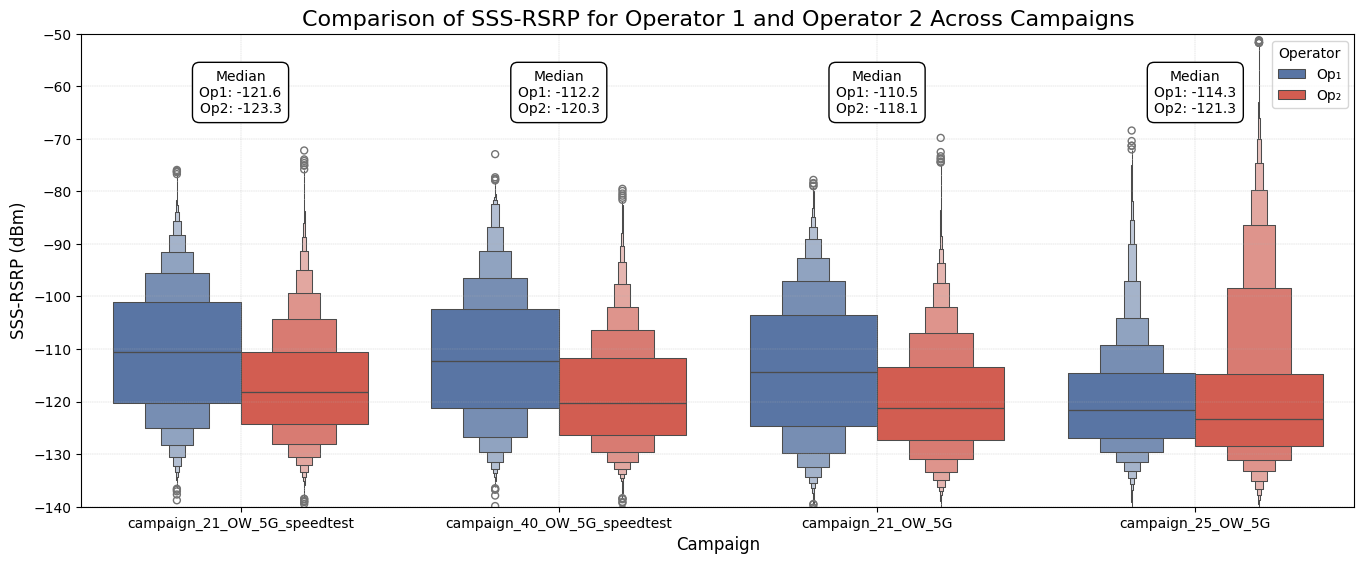

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use .loc to avoid SettingWithCopyWarning
op1_data_5g.loc[:, 'Operator'] = 'Op₁'
op2_data_5g.loc[:, 'Operator'] = 'Op₂'

# Combine the datasets for both operators
combined_data = pd.concat([op1_data_5g, op2_data_5g])

# Define custom colors: Blue for Operator 1, Red for Operator 2
custom_palette = {'Op₁': '#4c72b0', 'Op₂': '#e74c3c'}  # Blue and Red

# Create a single boxen plot for SSS-RSRP with both operators for each campaign
plt.figure(figsize=(14, 6))
sns.boxenplot(
    x='campaign',
    y='SSS-RSRP',  # Changed to SSS-RSRP
    hue='Operator',
    data=combined_data[combined_data['campaign'].isin(campaigns)],
    dodge=True,
    palette=custom_palette,
    k_depth='tukey',
    width_method='exponential'
)

# Calculate and place the median values above each plot with color-coding for Op1 and Op2
for i, campaign in enumerate(campaigns):
    # Median for Operator 1
    op1_median = op1_data_5g[op1_data_5g['campaign'] == campaign]['SSS-RSRP'].median()#combined_data[(combined_data['campaign'] == campaign) & (combined_data['Operator'] == 'Op₁')]['SSS-RSRP'].median()
    
    # Median for Operator 2
    op2_median = op2_data_5g[op2_data_5g['campaign'] == campaign]['SSS-RSRP'].median()#combined_data[(combined_data['campaign'] == campaign) & (combined_data['Operator'] == 'Op₂')]['SSS-RSRP'].median()
    print(f'op1: {op1_median} op2: {op2_median}' )
    # Move the box down by adjusting the second argument (40 in this case)
    plt.text(i, -65, f'Median\nOp1: {op1_median:.1f}\nOp2: {op2_median:.1f}',
             color='black', ha='center', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Set plot labels and title
plt.title('Comparison of SSS-RSRP for Operator 1 and Operator 2 Across Campaigns', fontsize=16)
plt.ylabel('SSS-RSRP (dBm)', fontsize=12)
plt.xlabel('Campaign', fontsize=12)
plt.xticks(rotation=0)  # Keep campaign names horizontal

# Adjust the legend to show only Op₁ and Op₂
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=labels[:2], title='Operator', loc='upper right')

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.3, alpha=0.7)

# Adjust y-axis limits to focus on the most relevant range
plt.ylim(-140, -50)  # Adjust the y-axis for typical SSS-RSRP values (change if necessary)

# Add some padding around the plot
plt.tight_layout(pad=2)

# Show the plot
plt.show()


### SSS-RSRQ

C:\Users\elmir\AppData\Local\Temp\ipykernel_12420\1031475894.py:18: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.3`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


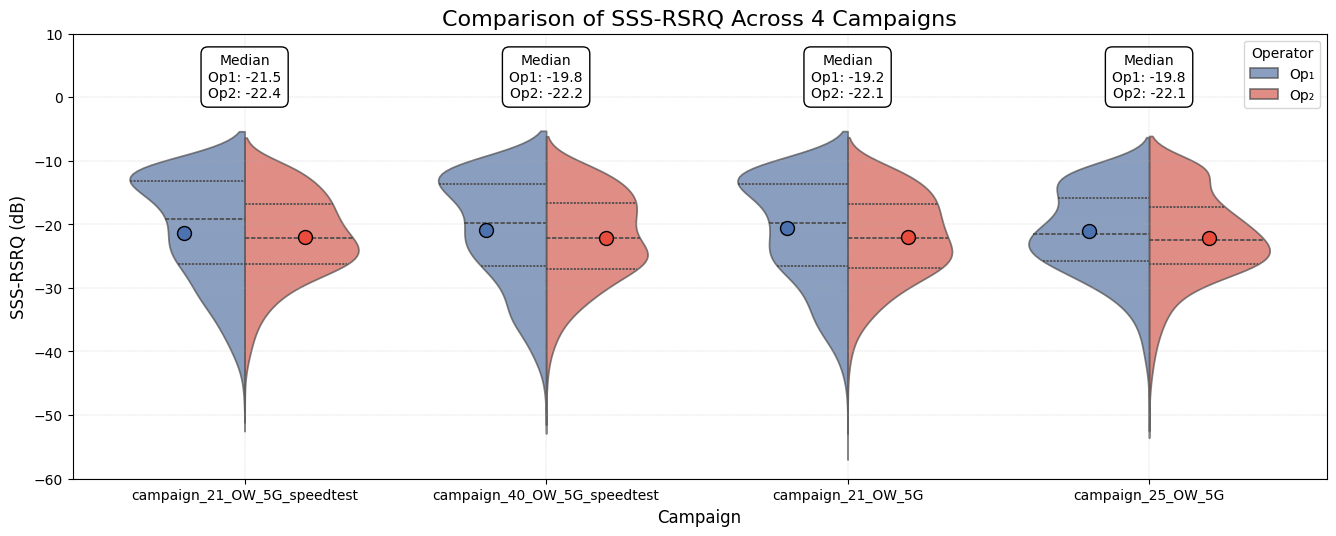

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Use .loc to avoid SettingWithCopyWarning
op1_data_5g.loc[:, 'Operator'] = 'Op₁'
op2_data_5g.loc[:, 'Operator'] = 'Op₂'

# Combine the datasets for both operators
combined_data = pd.concat([op1_data_5g, op2_data_5g])

# Define the custom color palette: Blue for Operator 1, Red for Operator 2
custom_palette = {'Op₁': '#4c72b0', 'Op₂': '#e74c3c'}  # Original custom palette

# Create a violin plot for SSS-RSRQ with both operators for each campaign
plt.figure(figsize=(14, 6))

sns.violinplot(
    x='campaign',
    y='SSS-RSRQ',
    hue='Operator',
    data=combined_data[combined_data['campaign'].isin(campaigns)],
    dodge=True,
    palette=custom_palette,
    split=True,       # Split violins to compare Op₁ and Op₂ directly
    bw=0.3,           # Bandwidth adjustment to smooth the KDE
    inner="quart",    # Show quartile lines
    alpha=0.7         # Add transparency for better readability
)

# Overlay mean points for Op₁ and Op₂
for i, campaign in enumerate(campaigns):
    # Mean for Operator 1
    op1_mean = np.mean(op1_data_5g[op1_data_5g['campaign'] == campaign]['SSS-RSRQ'])
    
    # Mean for Operator 2
    op2_mean = np.mean(op2_data_5g[op2_data_5g['campaign'] == campaign]['SSS-RSRQ'])
    
    # Plot means on the violin plot
    plt.scatter(i - 0.2, op1_mean, color=custom_palette['Op₁'], zorder=5, marker='o', s=100, edgecolor='black')
    plt.scatter(i + 0.2, op2_mean, color=custom_palette['Op₂'], zorder=5, marker='o', s=100, edgecolor='black')

# Calculate and place the median values above each plot
for i, campaign in enumerate(campaigns):
    # Median for Operator 1
    op1_median = op1_data_5g[op1_data_5g['campaign'] == campaign]['SSS-RSRQ'].median()
    
    # Median for Operator 2
    op2_median = op2_data_5g[op2_data_5g['campaign'] == campaign]['SSS-RSRQ'].median()

    # Place the median text
    plt.text(i, 0, f'Median\nOp1: {op1_median:.1f}\nOp2: {op2_median:.1f}',
             color='black', ha='center', fontsize=10,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Set plot labels and title
plt.title('Comparison of SSS-RSRQ Across 4 Campaigns', fontsize=16)
plt.ylabel('SSS-RSRQ (dB)', fontsize=12)  # Updated label for RSRQ
plt.xlabel('Campaign', fontsize=12)
#plt.xticks(rotation=45)  # Rotating x-axis labels for better readability

# Adjust the legend to show only Op₁ and Op₂
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[:2], labels=labels[:2], title='Operator', loc='upper right')

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.3, alpha=0.7)

# Adjust y-axis limits to create more space, and focus on a typical SSS-RSRQ range
plt.ylim(-60, 10)  # Adjust the y-axis for more space and typical SSS-RSRQ values

# Add some padding around the plot for better layout
plt.tight_layout(pad=3)

# Show the plot
plt.show()
